## Realizado por J. A. Osorio - C.C. 1035435726

Tarea 4.1 
[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg) 

Encontrar el minimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:

\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

1. Para ello realice una gráfica de la función en 3D, y un mapa de contourno de la función.
2. Determine el valor mínimo de la funcion con el metodo del gradiente descendente.


In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np


In [4]:
x=np.linspace(-1.5, 2.0, 200)
y=np.linspace(-1.5, 2.0, 200)
X, Y=np.meshgrid(x, y)
F = lambda x, y: (np.sin(0.5*x**2-0.25*y**2+3))*(np.cos(2*x+1-np.exp(y)))
Z = F(X,Y)

In [5]:
F(2, 2)

0.5524336596433623

<ipython-input-6-371c9222744b>:4: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(X, Y, Z, 40, lw=3, cmap=cm.viridis, linestyles="solid", offset=-1)
<ipython-input-6-371c9222744b>:11: UserWarning: The following kwargs were not used by contour: 'lw', 'offset'
  ax2.contour(X, Y, Z, 30, lw=3, cmap=cm.viridis, linestyles="solid", offset=-1)
<ipython-input-6-371c9222744b>:12: UserWarning: The following kwargs were not used by contour: 'lw'
  c=ax2.contourf(X, Y, Z, 30, lw=3,cmap=cm.viridis)


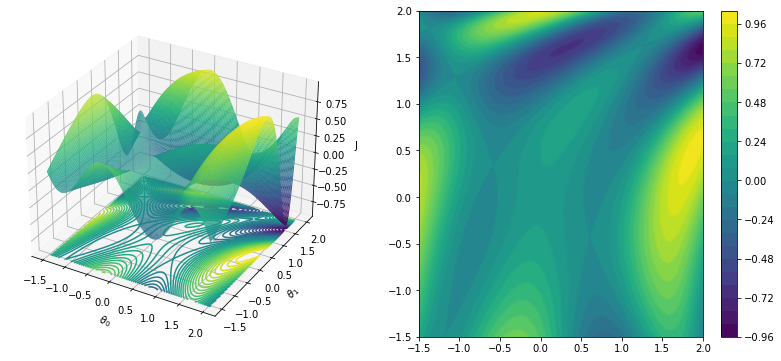

In [6]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121, projection="3d")
ax.plot_surface(X, Y, Z, cmap=cm.viridis, rstride=1, cstride=1, alpha=1)
ax.contour(X, Y, Z, 40, lw=3, cmap=cm.viridis, linestyles="solid", offset=-1)
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("J")
#ax.set_zlim(0, 30)

ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z, 30, lw=3, cmap=cm.viridis, linestyles="solid", offset=-1)
c=ax2.contourf(X, Y, Z, 30, lw=3,cmap=cm.viridis)
fig.colorbar(c,)

plt.show()

In [7]:
#Gradiente descendente
#En un abuso de notación, nos hemos referido a (x, y) como a las variables independientes, y también como a los valores 
#que minimizan la función

#Primero calculamos las derivadas parciales
#dF/dX
F_x = lambda x, y: x*np.cos(1 -np.exp(y) + 2*x)*np.cos(3 + x**2/2 - y**2/4) - 2*np.sin(1 - np.exp(y) + 2*x)*np.sin(3 + x**2/2 - y**2/4)

#dF/dY
F_y = lambda x, y:  np.exp(y)*np.sin(1 - np.exp(y) + 2*x)*np.sin(3 + x**2/2 - y**2/4) -1/2*y*np.cos(1 - np.exp(y) + 2*x)*np.cos(3 + x**2/2 - y**2/4)

def gradD(x, y, alpha, fp_x, fp_y):
    '''Metodo del gradiente descendente cuando hay dos variables usando cada una de las derivadas parciales'''
    return x - alpha*fp_x(x, y), y - alpha*fp_y(x, y)

In [8]:
def gradient_iteration(alpha, x_i, y_i, F_x, F_y, N):
    '''Metodo en el que se usa el gradiente descendente de manera iterativa'''
    X = [x_i]
    Y = [y_i]
    for i in range(N):
        #llamamos al metodo para obtener los nuevos valores
        x_i, y_i = gradD(x_i, y_i, alpha, F_x, F_y)
        X.append(x_i)
        Y.append(y_i)
        #miramos si las derivadas se acercan razonablemente a cero antes de que terminen las iteraciones
        if(abs(F_x(x_i, y_i)) < 1e-4 and abs(F_y(x_i, y_i))):
            break
    return X, Y, i

In [9]:
#parámetros iniciales
#learning rate
alpha = 0.007
#
x_i = 2.0 #x inicial
y_i = 2.0 #y inicial

N = 100 #number of iterations

X, Y, i = gradient_iteration(alpha, x_i, y_i, F_x, F_y, N)

In [10]:
X_, Y_=np.meshgrid(X, Y)
Z = F(X_,Y_) 

print("Despues de %d iteraciones, el minimo es: %f"%(i+1, F(X[-1], Y[-1])))
print("El valor minimo real es: %f"%Z.min())
print("El error relativo es de: %f%%"%(100*abs((F(X[-1], Y[-1])-Z.min())/Z.min())))

Despues de 100 iteraciones, el minimo es: -0.999648
El valor minimo real es: -0.999650
El error relativo es de: 0.000170%


El error es muy pequeño, el gradiente descendiente fue bastante preciso para la función dada!

# Tarea 4.2: 

De igual forma que con los sistemas metricos, la funcion de coste puede ser generalizada para otro tipo de metricas, de forma análoga a lo que ocurre con la distancia entre dos puntos. Sabemos que la metrica euclidiana puede ser escrita como:

\begin{equation}
d = \left[ \sum_{i=1}^{D}  (x_i-x_i')^2 \right]^{1/2}  (1)
\end{equation}

donde D es la dimension del espacio, así :

- Para una dimensión tenemos que D = 1:

\begin{equation}
d = |x_i-x_i'|
\end{equation}

- Para una dimensión tenemos que D = 2:
\begin{equation}
d = \left[ (x_1-x_1')^2 + (x_2-x_2')^2 \right]^{1/2} 
\end{equation}

- Para una dimensión tenemos que D = 3:
\begin{equation}
d = \left[ (x_1-x_1')^2 + (x_2-x_2')^2 + (x_3-x_3')^2 \right]^{1/2} 
\end{equation}


La metrica anterior puede ser generalizada como sigue, 

\begin{equation}
d = \left[ \sum_{i=1}^{D}  (x_i-x_i')^p \right]^{1/p} 
\end{equation}

Para n=2 tenemos que la metrica  de la ecuación (1).



Análogo a lo anterior, la funcion de coste puede emplear cualquiera de las metricas descritas dependiendo de la dimension o caracteristicas asociadas al sistema de estudio, para datos de una sola caracteristica la función de coste puede ser escrita como sigue:

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{pm} \sum_{i=1}^m |h_{\theta} X^{(i)})-y^{(i)}|^p
\end{equation}





Empleando los siguientes datos determine:

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

Determine los valores mínimos de $\theta_0$, $\theta_1$ para los siguientes casos:
 

 1. Emplea la metrica ecuclidiana con p = 2 compare su resultado con los valores empleando la libreria sklearn:[Linear Regresion](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

 2. Emple p = 1, p = 3. ¿Como varian los resultaodos en este caso?
 3. Construya las curvas de aprendizaje  para función del número  de datos para las situaciones descritas, ¿qué peude concluir?

Notamos que para cualquier p las derivadas están dadas por:

\begin{equation}
\frac{\partial J}{\partial \theta_0} = \frac{1}{m}\sum_{i=1}^{m}(h(X^{(i)})-y^{(i)})|h(X^{(i)})-y^{(i)}|^{p-2}
\end{equation}


\begin{equation}
\frac{\partial J}{\partial \theta_1} = \frac{1}{m}\sum_{i=1}^{m}(h(X^{(i)})-y^{(i)})|h(X^{(i)})-y^{(i)}|^{p-2}X^{(i)}
\end{equation}

Podemos usar entonces el gradiente descendiente:


In [73]:
def h(X, theta_0, theta_1):
    '''Funcion hipotesis h'''
    return theta_1*X + theta_0

def gradD(X, y, theta_0, theta_1, alpha, p):
    '''Metodo del gradiente descendiente para regresion lineal'''
    d_theta_0 = np.mean((h(X, theta_0, theta_1)-y)*abs(h(X, theta_0, theta_1)-y)**(p-2))
    d_theta_1 = np.mean((h(X, theta_0, theta_1)-y)*abs(h(X, theta_0, theta_1)-y)**(p-2)*X)
    return theta_0 - alpha*d_theta_0, theta_1 - alpha*d_theta_1

def gradient_iteration(X, y, theta_0, theta_1, alpha, p, N):
    '''Iteramos N veces hasta obtener valores theta_0, theta_1 optios'''
    for i in range(N):
        theta_0, theta_1 = gradD(X, y, theta_0, theta_1, alpha, p)
    return theta_0, theta_1


In [75]:
#LM fitting
from scipy.optimize import curve_fit

def func(x, a1, a0):
    return a1 * x + a0

Caso para p = 2

Parametro | sklearn | linear regression
theta_0 |  0.2108 | 0.2109
theta_1 |  0.1982 | 0.1981


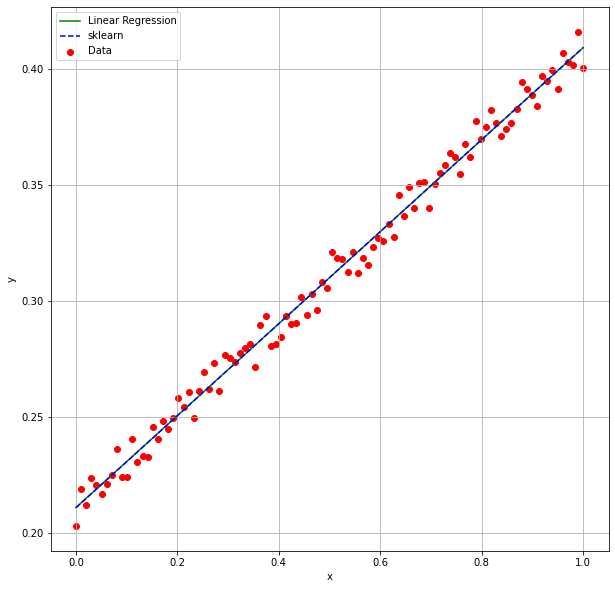

In [113]:
#parametros
alpha = 0.7
p = 2
N = 100
#datos para el ajuste
X = np.linspace(0, 1, N)
y = 0.2 + 0.2*X + 0.02*np.random.random(N)
theta_0_0 = 0.14
theta_1_0 = 0.14
#ajuste por metodo de gradiente
theta_0, theta_1 = gradient_iteration(X, y, theta_0_0, theta_1_0, alpha, p, N)
y_ = theta_1*X + theta_0
#ajuste sklearn
p0 = [theta_1_0, theta_0_0]
popt, pcov = curve_fit(func, X, y, p0, method='lm')
print("Parametro | sklearn | linear regression")
print("theta_0 | ", "%0.4f"%popt[1], "|", "%0.4f"%theta_0 )
print("theta_1 | ",  "%0.4f"%popt[0], "|",  "%0.4f"%theta_1 )
plt.figure(figsize=(10, 10))
plt.scatter(X, y, color='r', label="Data")
plt.plot(X, y_, 'g-', label="Linear Regression")
plt.plot(X, X*popt[0] + popt[1], 'b--', label="sklearn")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)

Notamos que hasta la 3 cifra significativa, tanto los valores del método realizado como los de sklearn coindicen y no se nota la diferencia en la gráfica

Caso para p = 1

Parametro | sklearn | linear regression
theta_0 |  0.2089 | 0.2092
theta_1 |  0.2032 | 0.2070


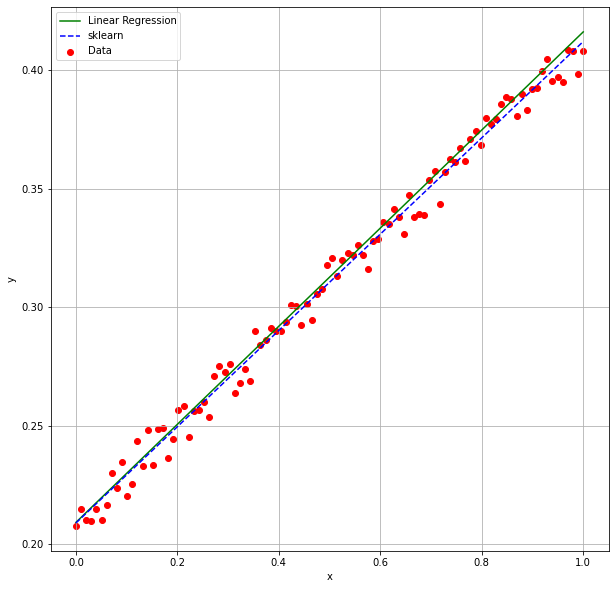

In [114]:
#parametros
alpha = 0.01
p = 1
N = 100
theta_0_0 = 0.14
theta_1_0 = 0.14
#datos para el ajuste
X = np.linspace(0, 1, N)
y = 0.2 + 0.2*X + 0.02*np.random.random(N)
#ajuste por metodo de gradiente
theta_0, theta_1 = gradient_iteration(X, y, theta_0_0, theta_1_0, alpha, p, N)
y_ = theta_1*X + theta_0
#ajuste sklearn
p0 = [theta_1_0, theta_0_0]
popt, pcov = curve_fit(func, X, y, p0, method='lm')
print("Parametro | sklearn | linear regression")
print("theta_0 | ", "%0.4f"%popt[1], "|", "%0.4f"%theta_0 )
print("theta_1 | ",  "%0.4f"%popt[0], "|",  "%0.4f"%theta_1 )
plt.figure(figsize=(10, 10))
plt.scatter(X, y, color='r', label="Data")
plt.plot(X, y_, 'g-', label="Linear Regression")
plt.plot(X, X*popt[0] + popt[1], 'b--', label="sklearn")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)

En este caso, se debe tomar un learning rate $\alpha$ mucho más pequeño que en el caso anterior

Caso para p = 3

Parametro | sklearn | linear regression
theta_0 |  0.2097 | 0.2140
theta_1 |  0.1993 | 0.1864


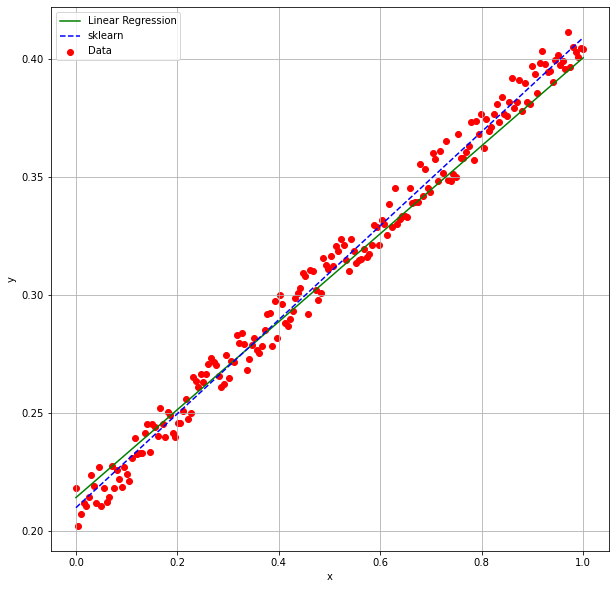

In [115]:
#parametros
alpha = 0.7
p = 3
N = 200
theta_0_0 = 0.14
theta_1_0 = 0.14
#datos para el ajuste
X = np.linspace(0, 1, N)
y = 0.2 + 0.2*X + 0.02*np.random.random(N)
#ajuste por metodo de gradiente
theta_0, theta_1 = gradient_iteration(X, y, theta_0_0, theta_1_0, alpha, p, N)
y_ = theta_1*X + theta_0
#ajuste sklearn
p0 = [theta_1_0, theta_0_0]
popt, pcov = curve_fit(func, X, y, p0, method='lm')
print("Parametro | sklearn | linear regression")
print("theta_0 | ", "%0.4f"%popt[1], "|", "%0.4f"%theta_0 )
print("theta_1 | ",  "%0.4f"%popt[0], "|",  "%0.4f"%theta_1 )
plt.figure(figsize=(10, 10))
plt.scatter(X, y, color='r', label="Data")
plt.plot(X, y_, 'g-', label="Linear Regression")
plt.plot(X, X*popt[0] + popt[1], 'b--', label="sklearn")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)

En este caso, si se toman más datos, hay un mejor ajuste, pero no es tan bueno como en los otros casos.

### Curvas de aprendizaje

In [123]:
#Metodo para generar k divisiones en forma de diccionario.
from sklearn.metrics import r2_score 

def get_K_divs(X_t, y, K, test_size_):
    divs = []
    for i in range(K):
        X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size = test_size_,  
                                                    random_state=None)
        divs.append({"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test})
    return divs
#Mi propia funcion de curva de aprendizaje
#usamos r2 score
def score(y, y_predicted):
    R_square = r2_score(y, y_predicted) 
    return R_square

def learning_curve(X_t, y, K, test_size_, alpha, p, theta_0, theta_1):
    #obtenemos las divisiones
    divs = get_K_divs(X_t, y, K, test_size_)
    #print(divs)
    #para almanecenar la media y std
    training_score = []
    training_score_std = []
    test_score = []
    test_score_std = []
    test_score = []
    #hacemos los splits
    #como minimo deben haber dos pares, y como máximo, el tamaño de todo el arreglo
    for split in range(2, X_t.shape[0]):
        #valores para promediar
        sub_training_score = np.array([])
        sub_test_score = np.array([])
        for div in divs:             
            #hacemos una selección, el split representa el indice hasta donde
            X_train = div["X_train"][0:split]
            y_train = div["y_train"][0:split]            
            X_test = div["X_test"]
            y_test = div["y_test"]
            #en algunos casos, hay valores de una sola clase, lanza error
            if(len(np.unique(y_train)) == 1):
                continue
            theta_0_, theta_1_ = gradient_iteration(X_train, y_train, theta_0, theta_1, alpha, p, len(X_train))
            y_X = lambda x: theta_0_ + theta_1_*x 
            #calculamos los score
            sub_training_score = np.append(sub_training_score, score(y_train, y_X(X_train)))
            sub_test_score = np.append(sub_test_score, score(y_test, y_X(X_test)))
        training_score.append(np.mean(sub_training_score))
        training_score_std.append(np.std(sub_training_score))
        
        test_score.append(np.mean(sub_test_score))
        test_score_std.append(np.std(sub_test_score))
    train_size = np.arange(2, X_t.shape[0], 1)
    return train_size, np.array(training_score), np.array(training_score_std), np.array(test_score), np.array(test_score_std)
    #for train_index, test_index in cv.split(X_t):
     #   print(train_index, test_index)

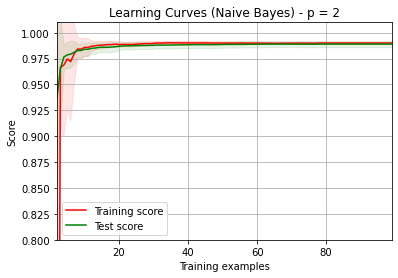

In [128]:
alpha = 0.7
p = 2
N = 100
theta_0_0 = 0.14
theta_1_0 = 0.14
#datos para el ajuste
X = np.linspace(0, 1, N)
y = 0.2 + 0.2*X + 0.02*np.random.random(N)
train_size, training_score, training_score_std, test_score, test_score_std = learning_curve(X, y, 20, 0.2, alpha, p, theta_0_0, theta_1_0)

plt.plot(train_size, training_score, 'r', label="Training score")
plt.fill_between(
        train_size,#sombra
        training_score - training_score_std,
        training_score + training_score_std,
        alpha=0.1,
        color="r",
    )
plt.plot(train_size, test_score,'g', label="Test score")
plt.fill_between(
        train_size,
        test_score - test_score_std,
        test_score + test_score_std,
        alpha=0.1,
        color="g",
    )
plt.title(u"Learning Curves (Naive Bayes) - p = 2")
plt.ylabel("Score")
plt.xlabel("Training examples")
plt.ylim(0.8, 1.01)
plt.xlim(train_size.min(), train_size.max())
plt.grid()
plt.legend(loc=0)

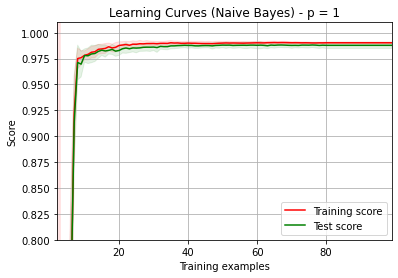

In [129]:
alpha = 0.01
p = 1
N = 100
theta_0_0 = 0.14
theta_1_0 = 0.14
#datos para el ajuste
X = np.linspace(0, 1, N)
y = 0.2 + 0.2*X + 0.02*np.random.random(N)
train_size, training_score, training_score_std, test_score, test_score_std = learning_curve(X, y, 10, 0.2, alpha, p, theta_0_0, theta_1_0)

plt.plot(train_size, training_score, 'r', label="Training score")
plt.fill_between(
        train_size,#sombra
        training_score - training_score_std,
        training_score + training_score_std,
        alpha=0.1,
        color="r",
    )
plt.plot(train_size, test_score,'g', label="Test score")
plt.fill_between(
        train_size,
        test_score - test_score_std,
        test_score + test_score_std,
        alpha=0.1,
        color="g",
    )
plt.title(u"Learning Curves (Naive Bayes) - p = 1")
plt.ylabel("Score")
plt.xlabel("Training examples")
plt.ylim(0.8, 1.01)
plt.xlim(train_size.min(), train_size.max())
plt.grid()
plt.legend(loc=0)

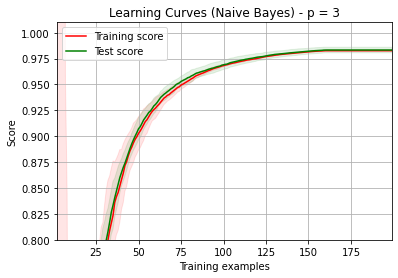

In [130]:
alpha = 0.7
p = 3
N = 200
theta_0_0 = 0.14
theta_1_0 = 0.14
#datos para el ajuste
X = np.linspace(0, 1, N)
y = 0.2 + 0.2*X + 0.02*np.random.random(N)
train_size, training_score, training_score_std, test_score, test_score_std = learning_curve(X, y, 10, 0.2, alpha, p, theta_0_0, theta_1_0)

plt.plot(train_size, training_score, 'r', label="Training score")
plt.fill_between(
        train_size,#sombra
        training_score - training_score_std,
        training_score + training_score_std,
        alpha=0.1,
        color="r",
    )
plt.plot(train_size, test_score,'g', label="Test score")
plt.fill_between(
        train_size,
        test_score - test_score_std,
        test_score + test_score_std,
        alpha=0.1,
        color="g",
    )
plt.title(u"Learning Curves (Naive Bayes) - p = 3")
plt.ylabel("Score")
plt.xlabel("Training examples")
plt.ylim(0.8, 1.01)
plt.xlim(train_size.min(), train_size.max())
plt.grid()
plt.legend(loc=0)

Notamos entonces que dependiendo del p, se requieren menos datos para que el modelo funcione. Notamos que p = 2 es el modelo que más funciona para una regresión lineal